In [1]:
# Importing all required libraries

import numpy as np
import pandas as pd
import re
import string
import numpy as np
import pandas as pd
import random
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt

sb.set()

In [2]:
# Importing data file

data = pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
#Quick view of Data set

print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17880, 18)


In [4]:
# there are missing values in the data set

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Identify missing values in the data set

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:title={'center':'Missing data values'}>

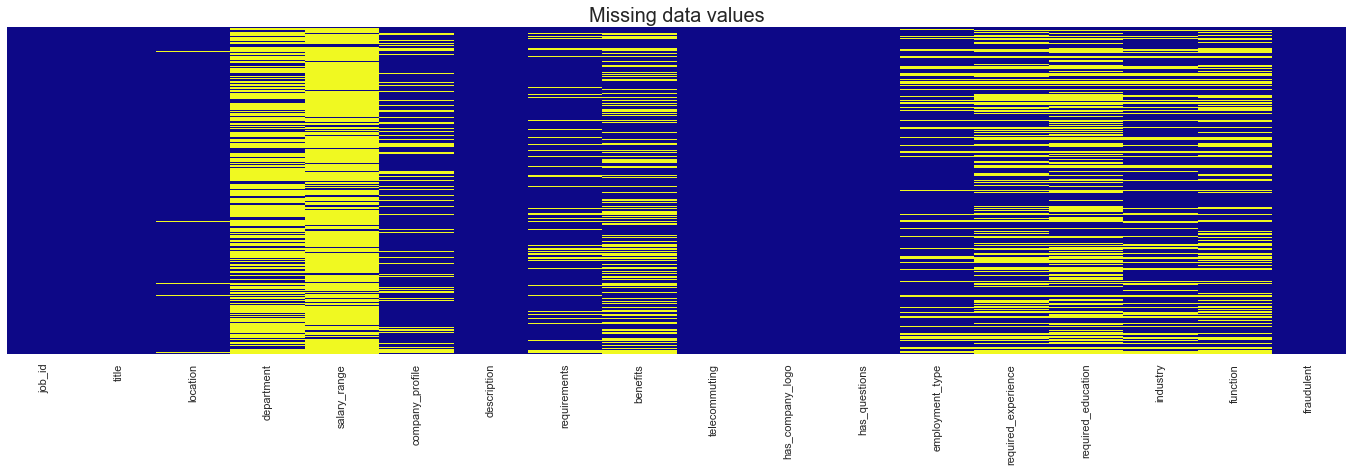

In [6]:
# Visualize missing data

plt.figure(figsize=(24, 6))
plt.title('Missing data values', size=20)
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [7]:
# fill in missing data of location

data.location = data.location.fillna('N/A')

In [8]:
# Splitting the locations in the location column into countries and create country column

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)

In [9]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [10]:
# Ratio of real and fake job from the data given

data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

Text(0.5, 1.0, 'Proportion of real and fake job posting')

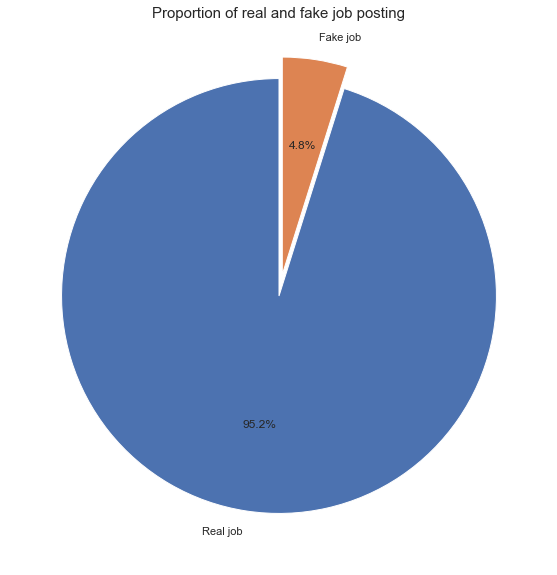

In [11]:
f = plt.figure(figsize = (10,10)) 
labels = 'Real job', 'Fake job'
explode = (0,0.1)
plt.pie(data['fraudulent'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of real and fake job posting", fontsize = 15) 

In [12]:
# Top 5 country with most job posting

data['country'].value_counts()[:5]

US    10656
GB     2384
GR      940
CA      457
DE      383
Name: country, dtype: int64

Text(0.5, 1.0, 'Proportion of job posting of top 5 countries')

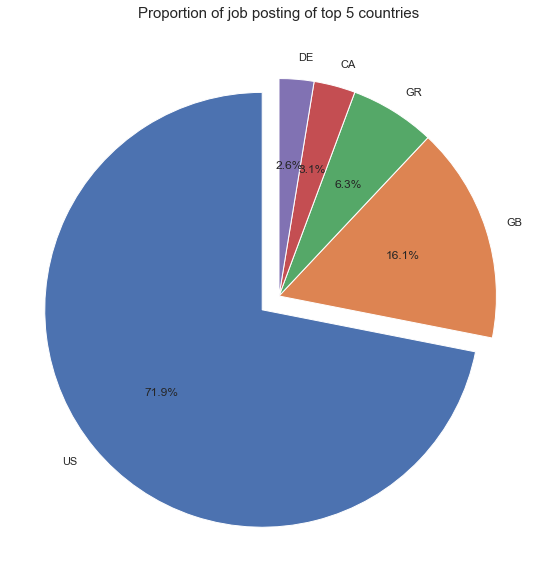

In [13]:
f = plt.figure(figsize = (10,10)) 
labels = 'US', 'GB', 'GR', 'CA', 'DE'
explode = (0.1, 0, 0, 0, 0)
plt.pie(data['country'].value_counts()[:5], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of job posting of top 5 countries", fontsize = 15) 

Text(0.5, 0, 'Country')

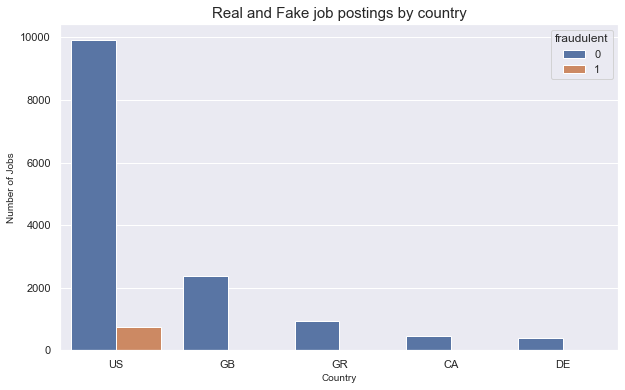

In [14]:
# top 5 countries with most fake and real job postings

plt.figure(figsize=(10, 6))

plt.title('Real and Fake job postings by country', size=15)
sb.countplot(x="country", hue="fraudulent", data=data, order=data['country'].value_counts().iloc[:5].index)
plt.ylabel('Number of Jobs', size=10)
plt.xlabel('Country', size=10)

In [15]:
# Top 5 country with most fake job posting

data[data.fraudulent == 1].country.value_counts()[:5]

US     730
AU      40
GB      23
N/A     19
MY      12
Name: country, dtype: int64

Text(0.5, 1.0, 'Ratio of fake job postings in top 5 countries')

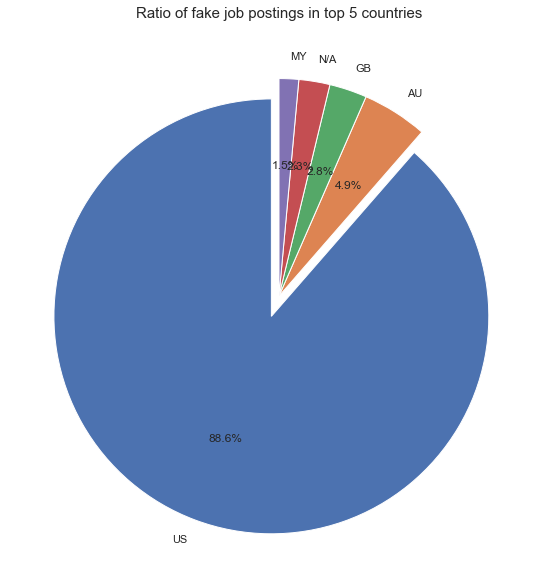

In [16]:
f = plt.figure(figsize = (10,10)) 
labels = 'US', 'AU', 'GB', 'N/A', 'MY'
explode = (0.1, 0, 0, 0, 0)
plt.pie(data[data.fraudulent == 1].country.value_counts()[:5], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Ratio of fake job postings in top 5 countries", fontsize = 15)

It is clear that US has the most fake job posting and job posting. Thus extracting job posting from US will allow us to analyze precisely and accuratly by excluding unecesary job postings from different countries

In [17]:
# Create a new data set US_data which only contains job posting from US 

data['Location'] = 0
for i in data:
  data['Location'] = data.location.str.extract('([A-z]+)')

ls = []
for i in range(len(data["Location"])):
  if data["Location"][i] == "US":
    ls.append(i)
    
US_data = data.loc[ls[:]] 
US_data = US_data.drop('Location', axis=1)
US_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,US


In [18]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 17877
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               10656 non-null  int64 
 1   title                10656 non-null  object
 2   location             10656 non-null  object
 3   department           3038 non-null   object
 4   salary_range         1557 non-null   object
 5   company_profile      8580 non-null   object
 6   description          10656 non-null  object
 7   requirements         8882 non-null   object
 8   benefits             5974 non-null   object
 9   telecommuting        10656 non-null  int64 
 10  has_company_logo     10656 non-null  int64 
 11  has_questions        10656 non-null  int64 
 12  employment_type      8894 non-null   object
 13  required_experience  6372 non-null   object
 14  required_education   6179 non-null   object
 15  industry             7974 non-null   object
 16  func

In [19]:
# New data set only containing job posting in US

US_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,US


Text(0.5, 1.0, 'Proportion of real and fake job posting in US')

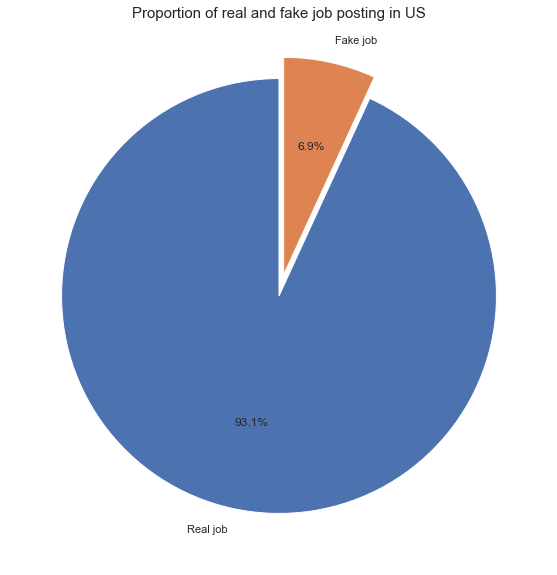

In [20]:
# Visualize ratio of Real and Fake job posting in US

f = plt.figure(figsize = (10,10)) 
labels = 'Real job', 'Fake job'
explode = (0,0.1)
plt.pie(US_data['fraudulent'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of real and fake job posting in US", fontsize = 15) 


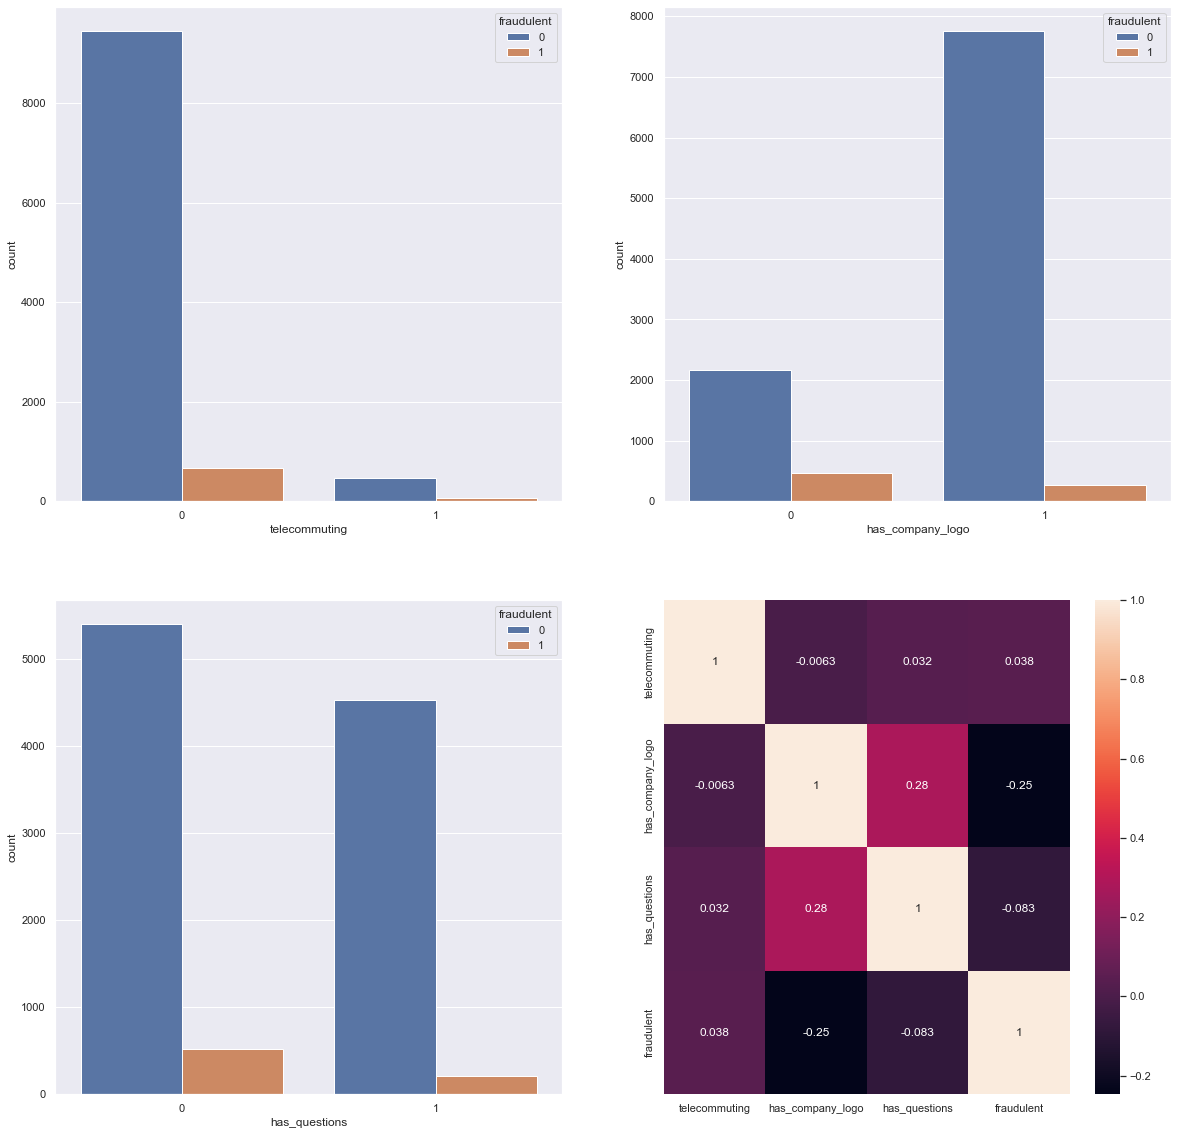

In [21]:
# from numerical data compare each coloumns with fradulent

f, axes = plt.subplots(2, 2, figsize=(20, 20))
sb.countplot(x="telecommuting", hue="fraudulent", data=US_data, ax = axes[0,0])
sb.countplot(x="has_company_logo", hue="fraudulent", data=US_data, ax = axes[0,1])
sb.countplot(x="has_questions", hue="fraudulent", data=US_data, ax = axes[1,0])
sb.heatmap(US_data[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);

There are significantly less fake job postings per numerical data columns for each as there are significantly less fake job postings in the dataset. It is hard to identify the trend and the heatmap also shows low correlation between each numerical data columns. however it is identified that fake job postings are less likely to be posted as telecommuting like real job postings. Also fake job postings mostly have no company logo, unlike real job postings. 


Text(0.5, 1.0, 'Ratio of fake job posting by required education in US')

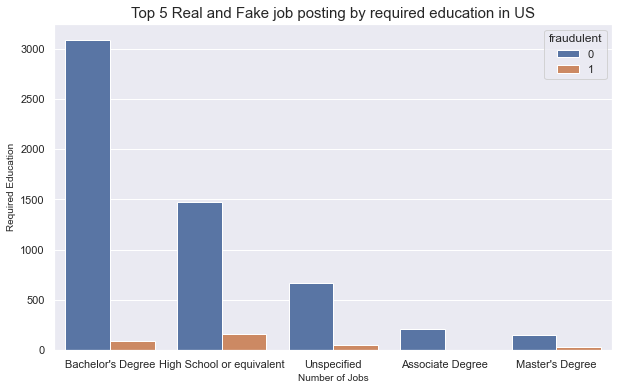

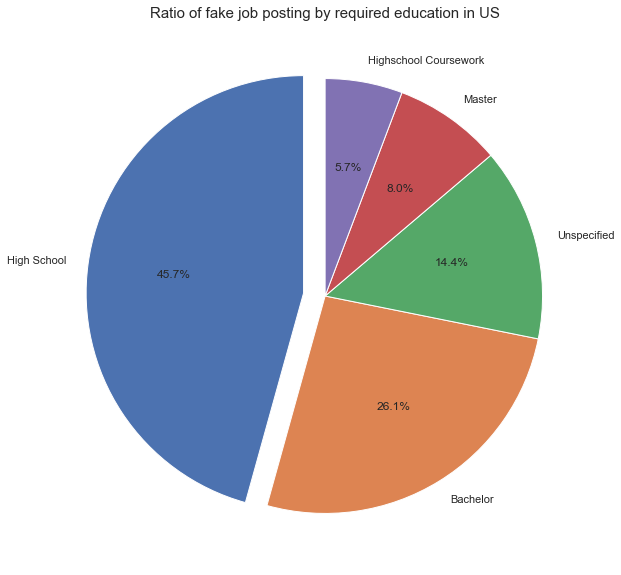

In [22]:
# from categorical data compare each coloumns with fradulent

f = plt.figure(figsize=(10, 6))

sb.countplot(x="required_education", hue="fraudulent", data=US_data, order=US_data['required_education'].value_counts().iloc[:5].index)
plt.title('Top 5 Real and Fake job posting by required education in US', size=15)
plt.ylabel('Required Education', size=10)
plt.xlabel('Number of Jobs', size=10)

f = plt.figure(figsize=(10, 10))
explode=(0.1, 0, 0, 0, 0)
labels = 'High School', 'Bachelor', 'Unspecified', 'Master', 'Highschool Coursework'
plt.pie(US_data[US_data.fraudulent == 1].required_education.value_counts()[:5], labels = labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Ratio of fake job posting by required education in US", fontsize = 15) 

Text(0.5, 1.0, 'Proportion of fake job posting by required experience in US')

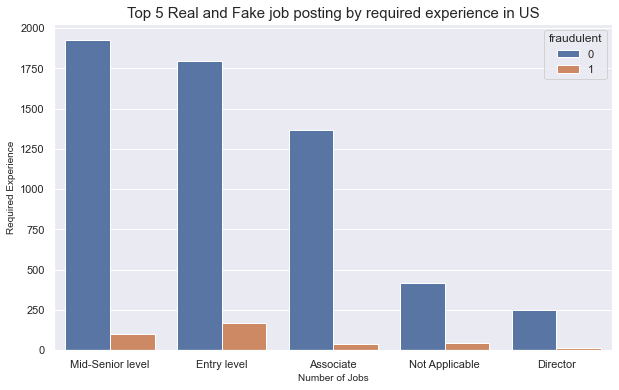

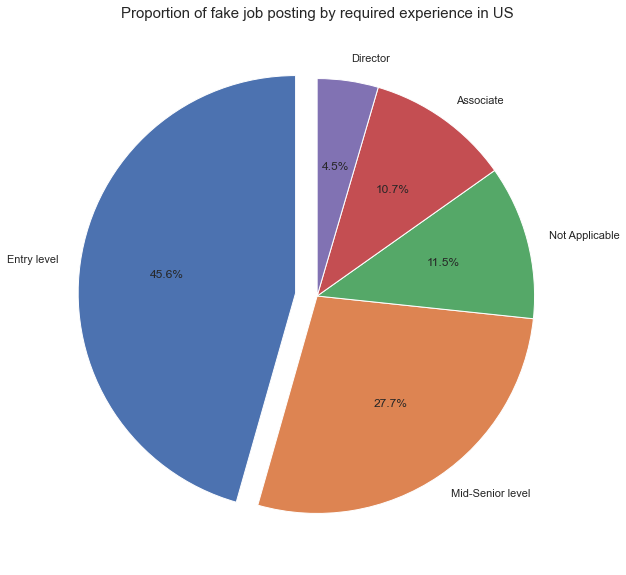

In [23]:
f = plt.figure(figsize=(10, 6))

sb.countplot(x="required_experience", hue="fraudulent", data=US_data, order=US_data['required_experience'].value_counts().iloc[:5].index)
plt.title('Top 5 Real and Fake job posting by required experience in US', size=15)
plt.ylabel('Required Experience', size=10)
plt.xlabel('Number of Jobs', size=10)

f = plt.figure(figsize=(10, 10))
explode=(0.1, 0, 0, 0, 0)
labels= 'Entry level', 'Mid-Senior level', 'Not Applicable', 'Associate', 'Director'
plt.pie(US_data[US_data.fraudulent == 1].required_experience.value_counts()[:5], labels = labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of fake job posting by required experience in US", fontsize = 15) 

Text(0.5, 1.0, 'Proportion of fake job posting by employment type in US')

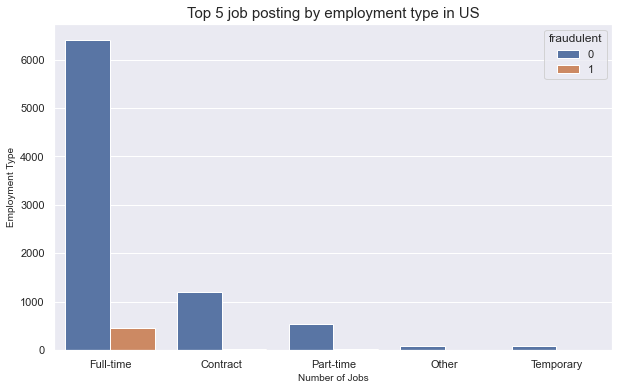

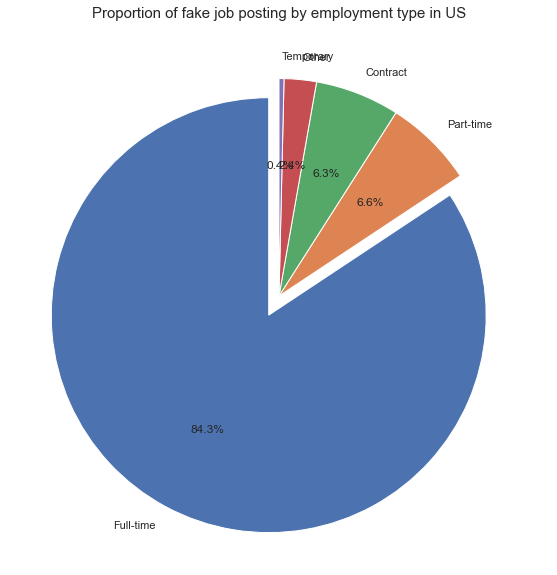

In [24]:
f = plt.figure(figsize=(10, 6))

sb.countplot(x="employment_type", hue="fraudulent", data=US_data, order=US_data['employment_type'].value_counts().iloc[:5].index)
plt.title('Top 5 job posting by employment type in US', size=15)
plt.ylabel('Employment Type', size=10)
plt.xlabel('Number of Jobs', size=10)

f = plt.figure(figsize=(10, 10))
labels = 'Full-time', 'Part-time', 'Contract', 'Other', 'Temporary'
explode=(0.1, 0, 0, 0, 0)
plt.pie(US_data[US_data.fraudulent == 1].employment_type.value_counts()[:5], labels = labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of fake job posting by employment type in US", fontsize = 15) 

Text(0.5, 1.0, 'Proportion of fake job posting by indsutry in US')

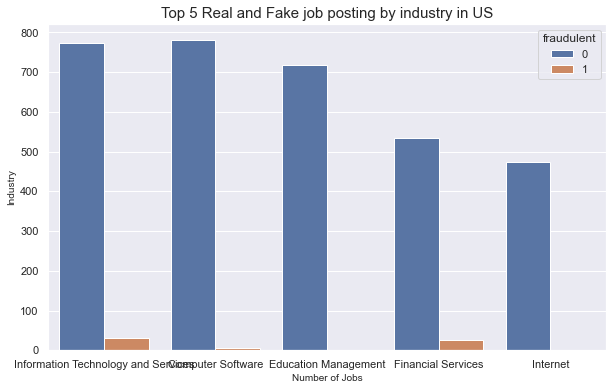

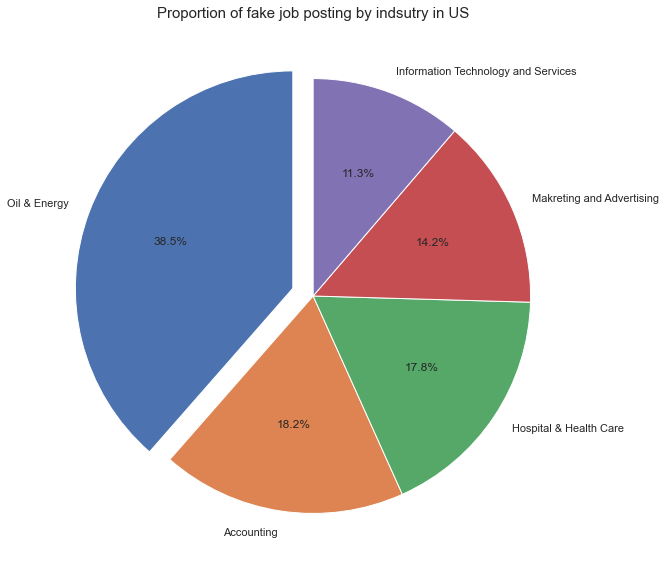

In [25]:
f = plt.figure(figsize=(10, 6))

sb.countplot(x="industry", hue="fraudulent", data=US_data, order=US_data['industry'].value_counts().iloc[:5].index)
plt.title('Top 5 Real and Fake job posting by industry in US', size=15)
plt.ylabel('Industry', size=10)
plt.xlabel('Number of Jobs', size=10)

f = plt.figure(figsize=(10, 10))
explode=(0.1, 0, 0, 0, 0)
labels= 'Oil & Energy', 'Accounting', 'Hospital & Health Care', 'Makreting and Advertising', 'Information Technology and Services'
plt.pie(US_data[US_data.fraudulent == 1].industry.value_counts()[:5], labels = labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of fake job posting by indsutry in US", fontsize = 15) 

From the visualisation, for required education, most fake job postings request high school. For required experience, entry level jobs have the highest fake job postings. For employment types, full time jobs have the highest fake job postings. For industry, the oil & energy industry is targeted the most by fake job postings.

In [26]:
US_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,US


In [27]:
# Create new data set to compare text 

US_data.drop(['job_id', 'title', 'location', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 
             'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 
             'function', 'country'], axis = 1, inplace = True)

US_data=US_data.dropna()


In [28]:
US_data.head()

,company_profile,description,requirements,benefits,fraudulent
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0
7,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0
23,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0
32,"We are an award-winning team of professionals,...",Construction: Entry-Level Craftsman Associate ...,Requirements: (Please do not apply if you do ...,Benefits: Hourly plus commissions. Work with ...,0


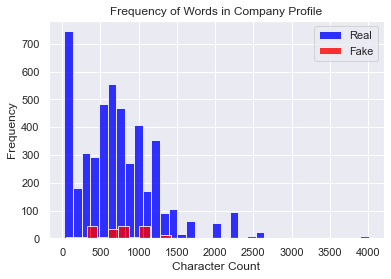

In [29]:
#character count plot for each coloumns against fraudulent 

US_data['company_profile_text'] = US_data.company_profile.apply(len)

US_data[US_data.fraudulent==0].company_profile_text.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
US_data[US_data.fraudulent==1].company_profile_text.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words in Company Profile')
plt.xlabel("Character Count");

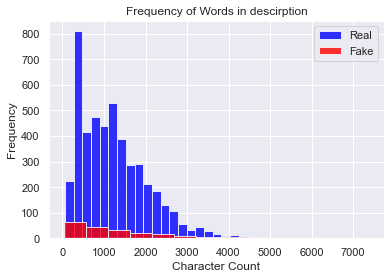

In [30]:
US_data['description_text'] = US_data.description.apply(len)

US_data[US_data.fraudulent==0].description_text.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
US_data[US_data.fraudulent==1].description_text.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words in descirption')
plt.xlabel("Character Count");

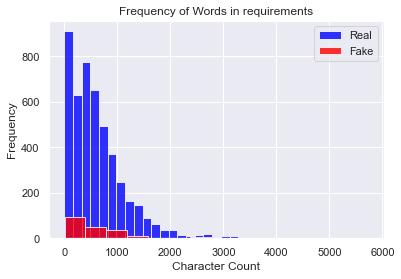

In [31]:
US_data['requirements_text'] = US_data.requirements.apply(len)

US_data[US_data.fraudulent==0].requirements_text.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
US_data[US_data.fraudulent==1].requirements_text.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words in requirements')
plt.xlabel("Character Count");

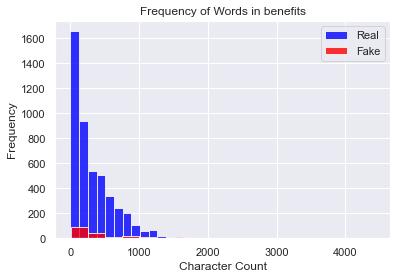

In [32]:
US_data['benefits_text'] = US_data.benefits.apply(len)

US_data[US_data.fraudulent==0].benefits_text.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
US_data[US_data.fraudulent==1].benefits_text.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words in benefits')
plt.xlabel("Character Count");

It is clear that the frequency of words in fake job postings are significantly lesser than real job postings. therefore, we can conclude that fake job postings are less likely to provide information to the candidates. 